# Quantum Volume (GPU)

Make sure that `qiskit-aer-gpu` is installed.

Installation:

1.  Download the wheel from https://github.com/Qiskit/qiskit-aer/releases
2.  Install with `pip install qiskit_aer_gpu*`

(*) is the version of qiskit-aer-gpu, and should be consistent with qiskit-aer and cuda.

**Don't use `pip install qiskit-aer-gpu` directly, because the newest wheel is not in PyPI**

In [2]:
from qiskit_experiments.library import QuantumVolume
from qiskit_experiments.framework import BatchExperiment
from qiskit import transpile, execute
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
from qiskit.quantum_info import Statevector

from qiskit import Aer
from qiskit_aer import AerSimulator
from qiskit_aer.noise.noise_model import NoiseModel

from quantum_volume import test_qv, qv_for_depth

import pandas as pd

from quantum_volume import qv_plot, qv_list_plot

## Using method from qiskit textbook

https://github.com/Qiskit/textbook/blob/main/notebooks/quantum-hardware/measuring-quantum-volume.ipynb

Procedure:

1. Set ``ncircuits`` and ``nshots``, sweep ``depth``
2. Generate ``ncircuits`` random circuits with SU(4) gates -> ideal simulation\
   ``ideal_heavy_outputs`` list of most likely 50% output states
3. For each random SU(4) ``circuit``, transpile with the noise model.\
   ``real_counts`` simulation outputs, formatted as (output state, counts)
4. If an ``output state`` is in ``ideal_heavy_outputs``, then ``N_heavy += counts``

Finally, ${\rm HOP} = N_{\rm heavy} / N_{\rm shots} N_{\rm circs} $

Standard deviation, $\sigma = \sqrt{{\rm HOP}(1-{\rm HOP})/N_{\rm circs} }$ (as defined in the textbook, no $N_{\rm shots}$ ?)

Criteria of success: ${\rm HOP} - 2\sigma > 2/3$

Quantum Volume: 256
Percentage Heavy Outputs: 77.8%
Passed?: True



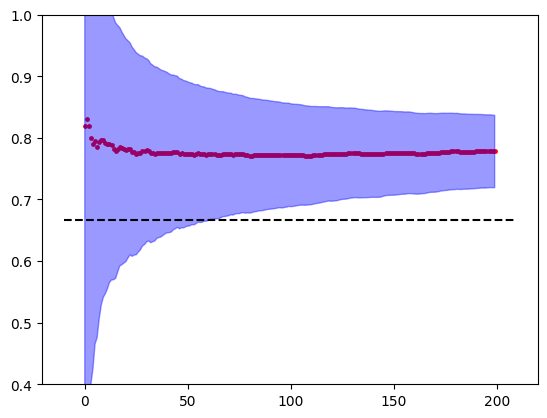

In [3]:
# Test code 

from fake_Huayi32_LE import FakeHuayi32_LE, FakeHuayi32_LEV2

simulator = FakeHuayi32_LE()

ncircuits = 200
nshots = 100
depth = 8

simulator_gpu = AerSimulator(method="statevector", 
                             device="GPU",
                             noise_model=NoiseModel.from_backend(simulator))

result, qv_circs, tr_circs = test_qv(simulator_gpu, depth, ncircuits=ncircuits, nshots=nshots)

qv_plot(result)


In [ ]:
# Main

from fake_Huayi32 import FakeHuayi32
from fake_Huayi37 import FakeHuayi37

# Set simulators to check performance
simulators = [FakeHuayi32(), FakeHuayi37()]

n_circuits = 500
n_shots = 100
depths = range(2, 9)

for simulator in simulators:
    
    simulator_gpu = AerSimulator(method="statevector", 
                                device="GPU",
                                noise_model=NoiseModel.from_backend(simulator))
    
    results = qv_for_depth(simulator_gpu, 
                           depths, 
                           n_circuits, 
                           n_shots, 
                           f"QV_{simulator_gpu.name()}")
    
    display(results)


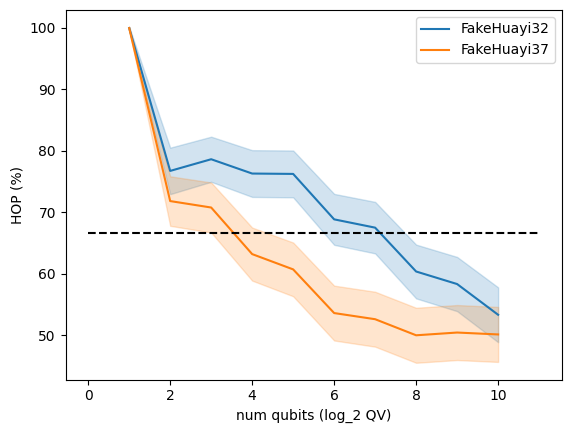

In [11]:
# Read and plot the results from the stored files

qv_list_plot(["FakeHuayi32","FakeHuayi37"],
             depths=range(1,11), dirname="QV_test")
        